# LCG vs. Mersenne Twister algorithm in Monte Carlo simulations

## Author
- **Name:** Gevorg Nersesian
- **Email:** gevorg_nersesian@edu.aua.am
- **Affiliation:** American University of Armenia
- **Date:** 2024-12-10

Submitted as a research project for CS226 class, under supervision of Mr. Varazdat Stepanyan (vstepanyan@aua.am)


Find the full source code in [GitHub](https://github.com/avmonte/hybrid_rng_efficiency_analysis/tree/master)

## Objective
The objective of this experiment is to compare the **accuracy** and **convergence speed** of two random number generators (RNGs):
1. **Linear Congruential Generator (LCG):** A simple PRNG commonly used in early computing.
2. **Python's Built-in Random Module:** Based on the Mersenne Twister, a widely-used RNG known for its high quality and long period.

By using these RNGs in a Monte Carlo simulation to estimate $\pi$, we aim to assess their performance and behavior in terms of:
- Accuracy of the estimate.
- Convergence speed.

---

## Methodology

### 1. Monte Carlo Simulation: Estimation of $\pi$ using Buffon's Needle

We estimate $\pi$ using Buffon's Needle experiment, based on the following steps:

1. Consider a floor with parallel lines spaced at a distance $d$ apart ($d > 0$).
2. Randomly "drop" a needle of length $l$ ($l \leq d$) onto the floor.
3. The needle intersects a line if:

   $y \leq \frac{l}{2} \sin(\theta)$

   where $y$ is the distance of the needle's center from the nearest line, and $\theta$ is the angle between the needle and the parallel lines.

4. Simulate a large number of needle drops ($N$) by generating random values for $y$ (uniformly in $[0, d/2)$) and $\theta$ (uniformly in $[0, \pi)$).
5. Count the number of needles ($N_{\text{intersect}}$) that intersect a line.
6. Estimate $\pi$ using the probability formula:

   $$\pi \approx \frac{2lN}{dN_{\text{intersect}}}$$

This method demonstrates how the randomness of needle drops provides a probabilistic way to calculate $\pi$.

---

### 2. Random Number Generators

- **LCG Implementation:**

  $$X_{n+1} = (a \cdot X_n + c) \mod m$$

  Parameters used (trivial on purpose):
  - $a = 3$
  - $c = 7$
  - $m = 10$
  - Seed: runtime timestamp

- **Python's Built-in RNG:** Utilizes the `random` module, which is based on the Mersenne Twister algorithm.

---

### 3. Experiment Design

#### Metrics:
1. **Accuracy:** Absolute error of the estimate:

   $$\text{Error} = |\hat{\pi} - \pi|$$

2. **Convergence Speed:** Rate at which the error decreases with increasing $N$, following the expected $1/\sqrt{N}$ behavior.

#### Steps:
1. Perform Monte Carlo simulations using each RNG for a range of $N$ (e.g., $10^2$ to $10^6$).
2. For each $N$, compute the estimate of $\pi$ and its error.
3. Repeat the experiment for multiple independent runs to compute variance and stability of the estimates.
4. Compare the results (accuracy, convergence) between the two RNGs.

---

## Expected Results

### 1. Accuracy
- Plot the **absolute error** vs. $N$ on a log-log scale for both RNGs.
- Expectation: Both RNGs should achieve similar accuracy, as Monte Carlo error depends primarily on $1/\sqrt{N}$, not the quality of the RNG (as long as the RNG is "random enough").

### 2. Convergence Speed
- Compare how quickly the error decreases for each RNG as $N$ increases.
- Expectation: Python's RNG might converge more smoothly, especially at larger $N$, due to better randomness properties, while LCG may show more fluctuations.

---

**Import the necessary functionality**

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd() / "scripts") )

from scripts.common import get_qo_arev_truly_random_number as true_entropy
from scripts.simulators import estimate_pi_buffon
from scripts.common import are_we_there_yet as calc_error
from scripts.randomNGs import lcg

import time
import numpy as np
import random
import matplotlib.pyplot as plt

## Buffon's Needle Simulation

Overview of the estimator script

In [2]:
NEEDLE_LENGTH = 1
LINE_SPACING = 2
NUM_NEEDLES = 1000000

THRESHOLD = 0.01

In [3]:
estimate = estimate_pi_buffon(NEEDLE_LENGTH, LINE_SPACING, NUM_NEEDLES)
print(f"Estimated pi: {estimate}\nError: {calc_error(estimate)}")

Estimated pi: 3.138012947441421
Error: 0.003579706148371997


### Experiment: Accuracy

In [4]:
def calc_plot_accuracy(needle_length, spacing, num_needles, seed_range):
    lcg_errors = []
    random_errors = []
    
    for seed in range(seed_range):
        lcg.seed(seed)
        random.seed(seed)
    
        pi_estimate_lcg = estimate_pi_buffon(needle_length, spacing, num_needles, rng=lcg)
        pi_estimate_random = estimate_pi_buffon(needle_length, spacing, num_needles)
        
        lcg_errors.append(calc_error(pi_estimate_lcg))
        random_errors.append(calc_error(pi_estimate_random))
    
    plt.figure(figsize=(8, 6))
    plt.boxplot([lcg_errors, random_errors], labels=["LCG", "Random's RNG"])
    plt.ylabel("Absolute Error")
    plt.title(f"Accuracy Comparison at N = {NUM_NEEDLES}")
    plt.grid(axis="y", linestyle="--", linewidth=0.5)
    plt.show()


In [5]:
NEEDLE_LENGTH = 1
LINE_SPACING = 2
NUM_NEEDLES = 10 ** 3

SEED_RANGE = 100

Figure 1. Let's first try to run the accuracy experiment with `NUM_NEEDLES = 10^3` to see if there is any significant difference in the accuracy of the two RNGs.

/var/folders/9m/fxh4wcw146v_qk7fkh6xgd_80000gn/T/ipykernel_13225/407211178.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lcg_errors, random_errors], labels=["LCG", "Random's RNG"])
/Users/gevorg/miniconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


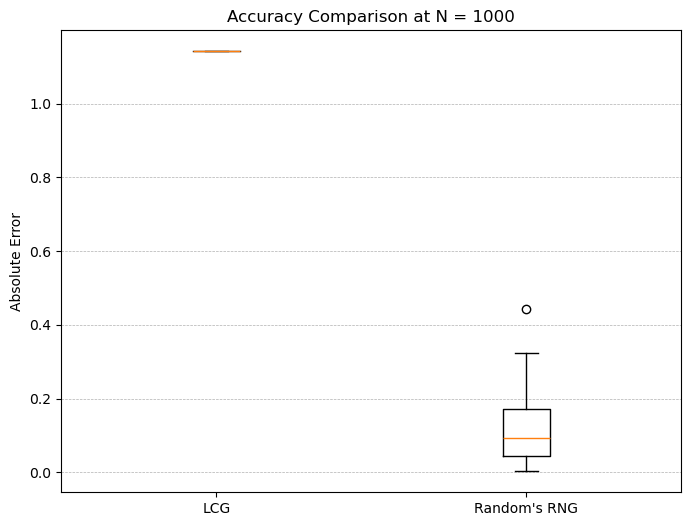

In [6]:
calc_plot_accuracy(NEEDLE_LENGTH, LINE_SPACING, NUM_NEEDLES, SEED_RANGE)

Figure 2. They are very close to each other, as expected. Let's try to increase the number of needles to see if there is any difference.

In [7]:
NEEDLE_LENGTH = 1
LINE_SPACING = 2
NUM_NEEDLES = 10 ** 5

SEED_RANGE = 100

/var/folders/9m/fxh4wcw146v_qk7fkh6xgd_80000gn/T/ipykernel_13225/407211178.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lcg_errors, random_errors], labels=["LCG", "Random's RNG"])
/Users/gevorg/miniconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


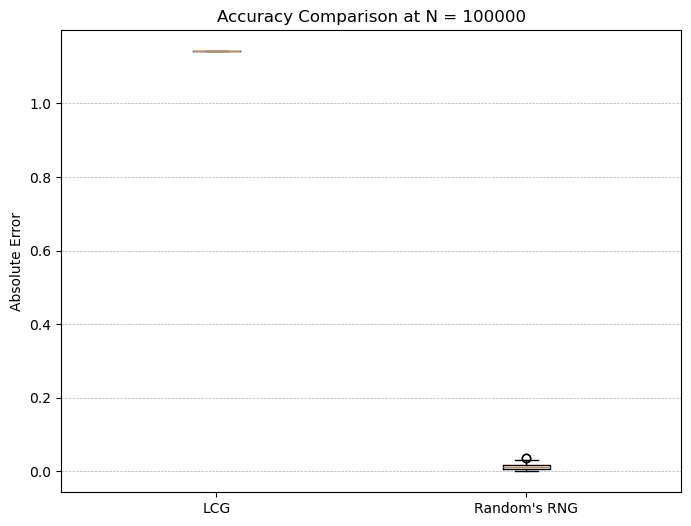

In [8]:
calc_plot_accuracy(NEEDLE_LENGTH, LINE_SPACING, NUM_NEEDLES, SEED_RANGE)

### Experiment: Convergence Speed

In [9]:
def calculate_convergence(needle_length, spacing, num_needles):
    # Define number of needles for each simulation
    needle_counts = np.logspace(1, np.log10(num_needles), num=100, dtype=int)
    errors = []
    errors_orig = []
    t = time.time()
    lcg.seed(t)
    random.seed(t)

    # Compute the absolute error for each needle count
    for n in needle_counts:
        a = [estimate_pi_buffon(needle_length, spacing, n, rng=lcg) for _ in range(10)]
        b = [estimate_pi_buffon(needle_length, spacing, n) for _ in range(10)]

        pi_estimate = np.mean(a)
        pi_estimate_orig = np.mean(b)
        
        # pi_estimate = estimate_pi_buffon(needle_length, spacing, n, rng=lcg)
        # pi_estimate_orig = estimate_pi_buffon(needle_length, spacing, n)
        
    
        errors.append(calc_error(pi_estimate))
        errors_orig.append(calc_error(pi_estimate_orig))
        
    return needle_counts, errors, errors_orig
        
def handle_plotting(needle_counts, errors, errors_orig):
    plt.figure(figsize=(8, 6))
    plt.loglog(needle_counts, errors, label="Buffon's Needle Error: LCG")
    plt.loglog(needle_counts, errors_orig, label="Buffon's Needle Error: Random")
    plt.loglog(needle_counts, 1 / np.sqrt(needle_counts), label="1 / sqrt(N) (Expected)", linestyle="--")
    plt.xlabel("Number of Needles")
    plt.ylabel("Absolute Error")
    plt.title("Convergence Rate of Buffon's Needle Experiment")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

In [10]:
NEEDLE_LENGTH = 1
LINE_SPACING = 2
NUM_NEEDLES = 10 ** 3

Figure 3. Again let's try to run the convergence experiment for a relatively small number of needles. We find that both RNGs converge similarly.

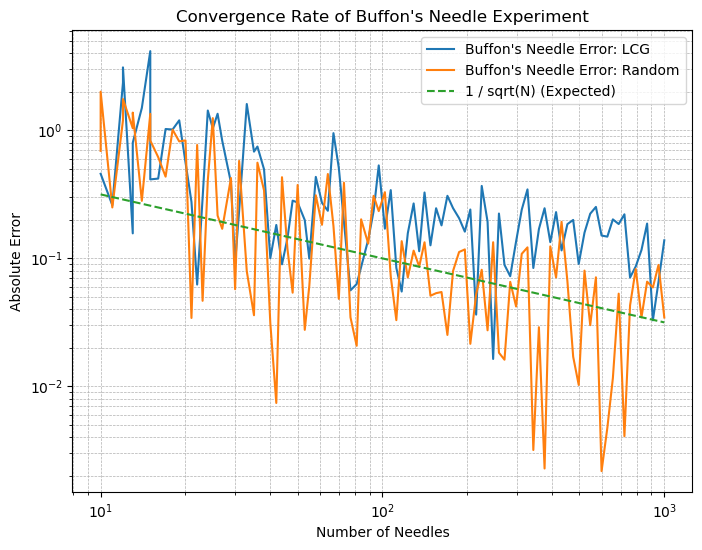

In [11]:
needle_counts, errors, errors_orig = calculate_convergence(NEEDLE_LENGTH, LINE_SPACING, NUM_NEEDLES)
handle_plotting(needle_counts, errors, errors_orig)

Figure 4. However, if we increase the `NUM_NEEDLES` to a larger value, we can see the LCG diverging significantly from the expected $1/\sqrt{N}$ behavior.

In [12]:
NUM_NEEDLES = 10 ** 5

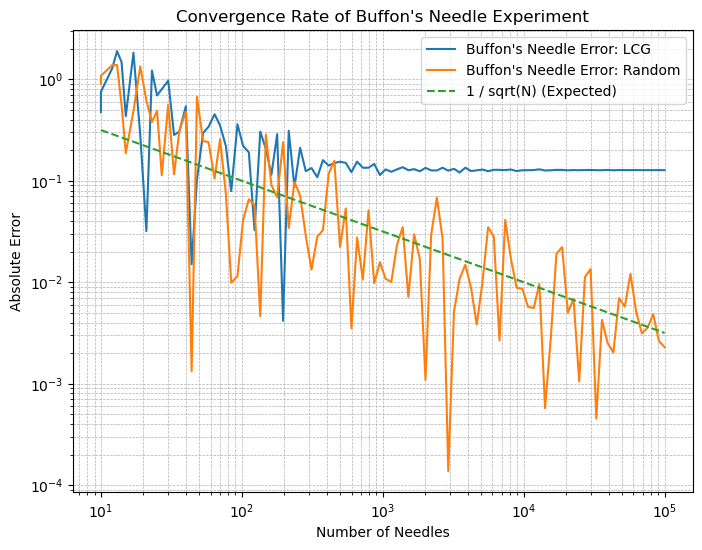

In [13]:
needle_counts, errors, errors_orig = calculate_convergence(NEEDLE_LENGTH, LINE_SPACING, NUM_NEEDLES)
handle_plotting(needle_counts, errors, errors_orig)

## Conclusion

Despite its shortcomings and status as a legacy method, the Linear Congruential Generator (LCG) demonstrates surprising effectiveness in Monte Carlo simulations. When estimating  $\pi$, even with deliberately trivial parameters (e.g., 3, 7, 10), the LCG produced unexpectedly consistent results. This highlights its capability to deliver reliable outcomes for Monte Carlo methods under many conditions.

While the Mersenne Twister significantly outshines the LCG in randomness quality and is the clear choice for modern applications, the LCG remains a viable tool for scenarios that do not require high-quality randomness. Its performance showcases the robustness of Monte Carlo methods to imperfections in the RNG. Remarkably, even with such trivial parameters, the LCG demonstrated accurate results and convergence speed up to $10^3$ iterations inclusive, far exceeding expectations for such basic configurations.
